<a href="https://colab.research.google.com/github/sivakrishna648/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Customer Segmentation Analysis using Machine Learning

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load Dataset
data = pd.read_csv('/content/customer_data.csv')

In [ ]:
# Preview Data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)
0           1   58    Male                  23                      59
1           2   25    Male                  99                      80
2           3   19  Female                  33                      73
3           4   65  Female                 146                      13
4           5   35  Female                  75                      10


In [ ]:
# Data Preprocessing
# Convert categorical Gender to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Feature Selection
X = data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
# Apply KMeans Clustering (Assuming optimal clusters = 4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
# Add the clusters to the data
data['Cluster'] = clusters

In [ ]:
# Preview Data with Cluster Labels
print("\nData with cluster labels:")
print(data.head())


Data with cluster labels:
   CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)  \
0           1   58       0                  23                      59   
1           2   25       0                  99                      80   
2           3   19       1                  33                      73   
3           4   65       1                 146                      13   
4           5   35       1                  75                      10   

   Cluster  
0        0  
1        1  
2        3  
3        2  
4        3  


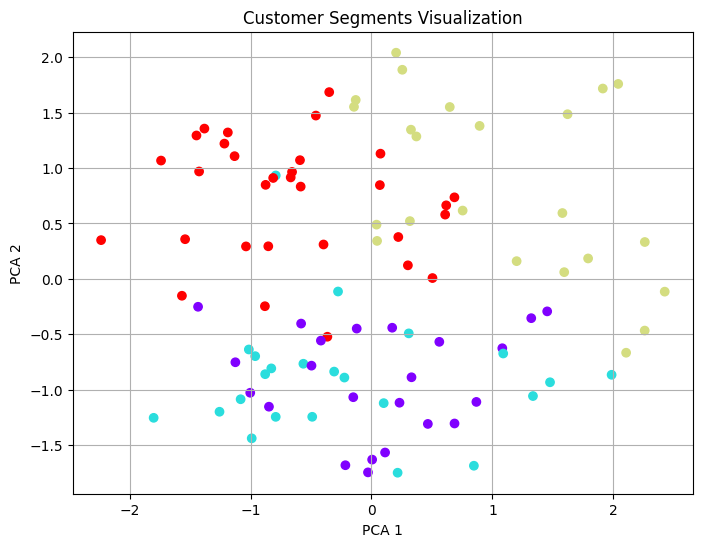

In [ ]:
# Visualize the Clusters using PCA
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

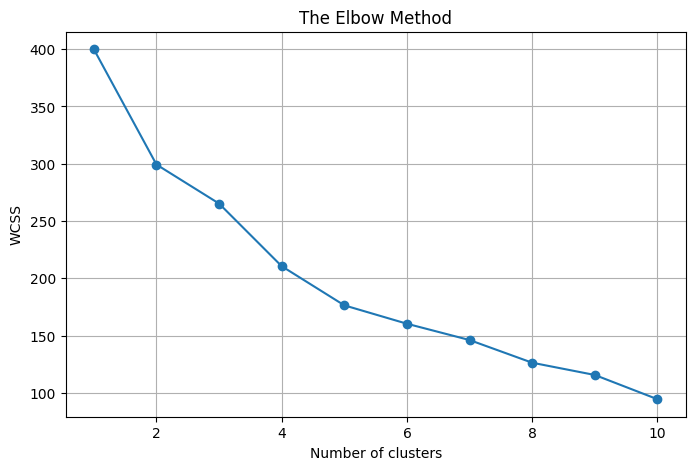

In [ ]:
# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Analyze the clusters
print("\nCluster Analysis:")
print(data.groupby('Cluster').mean())


Cluster Analysis:
         CustomerID        Age    Gender  Annual Income (k$)  \
Cluster                                                        
0         56.130435  48.608696  0.000000           44.869565   
1         52.869565  35.347826  0.043478           89.956522   
2         45.086957  47.043478  0.521739          130.565217   
3         48.580645  39.806452  1.000000           62.096774   

         Spending Score (1-100)  
Cluster                          
0                     32.652174  
1                     78.956522  
2                     27.782609  
3                     49.548387  
